In [12]:
sys.path.append('/ubc/ece/home/ra/grads/siyi/Research/skin_lesion_segmentation/skin-lesion-segmentation-transformer')
from Datasets.create_dataset import norm01, SkinClasDataset
import torch
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.colors as mpc
import numpy as np
import pandas as pd
import sys
import os
import torchvision
import random
import h5py
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
import seaborn as sns

In [13]:
seed = 42
random.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)

In [26]:
data_folder = '/bigdata/siyiplace/data/skin_lesion'
features_list = []
diagnosis_id_list = []  # class
dataset_id_list = []  # dataset
d_label_list= []   # dynamic domain label
DC_list = []
model_name = 'FATNet_KT_adapt'
exp_name = 'V4'
# ['isic2018','PH2','DMF','SKD']
for dataset_name in ['isic2018','PH2','DMF','SKD']:
    hdf_path = data_folder+'/{}/{}_{}_feature_{}.h5'.format(dataset_name,exp_name, model_name,dataset_name)
    # hdf_path = data_folder+'/{}/{}_feature_{}.h5'.format(dataset_name,model_name,dataset_name)
    with h5py.File(hdf_path, 'r') as f:
        features = np.array(f['feature'])
        diagnosis_ids = list(f['diagnosis_id'])
        d_labels = list(f['d_label'])
        dataset_ids = list(f['dataset_id'])
        # DC_ids = list(f['DC_id'])
    f.close()
    features_list.append(features)
    diagnosis_id_list.extend(diagnosis_ids)
    dataset_id_list.extend(dataset_ids)
    d_label_list.extend(d_labels)
    # DC_list.extend(DC_ids)
    # print(dataset_ids)


In [18]:
print(len(d_label_list))

4212


In [26]:
'''
load one pdf only for four datasets analysis
'''
features_list = []
dataset_id_list = []  # dataset
d_label_list= []   # dynamic domain label
model_name = 'FATNet_adapt'
exp_name = 'N28'
hdf_path = '/ubc/ece/home/ra/grads/siyi/Research/skin_lesion_segmentation/results/N_results/{}/knn_SupSKDo_80_2_dynamic_oht_FATNet_adapt_20221204_1917/feature_epoch{}.h5'.format(
    exp_name, '60')
with h5py.File(hdf_path, 'r') as f:
    features = np.array(f['feature'])
    d_labels = list(f['d_label'])
    dataset_ids = list(f['dataset_id'])
f.close()
features_list.append(features)
dataset_id_list.extend(dataset_ids)
d_label_list.extend(d_labels)

OSError: Unable to open file (unable to open file: name = '/ubc/ece/home/ra/grads/siyi/Research/skin_lesion_segmentation/results/N_results/N28/knn_SupSKDo_80_2_dynamic_oht_FATNet_adapt_20221204_1917/feature_epoch60.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [11]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=4000).fit_transform(features)
# tsne = PCA(n_components=2).fit_transform(features)

/ubc/ece/home/ra/grads/siyi/anaconda3/envs/skinlesion/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/ubc/ece/home/ra/grads/siyi/anaconda3/envs/skinlesion/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [4]:
# scale and move the coordinates so they fit [0; 1] range
def scale_to_01_range(x):
    # compute the distribution range
    value_range = (np.max(x) - np.min(x))
 
    # move the distribution so that it starts from zero
    # by extracting the minimal value from all its values
    starts_from_zero = x - np.min(x)
 
    # make the distribution fit [0; 1] by dividing by its range
    return starts_from_zero / value_range
 
# extract x and y coordinates representing the positions of the images on T-SNE plot
# tx = tsne[:, 0]
# ty = tsne[:, 1]
 
# tx = scale_to_01_range(tx)
# ty = scale_to_01_range(ty)

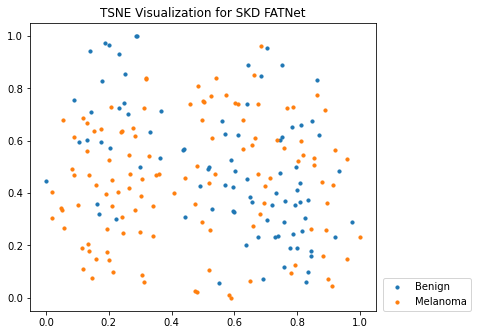

In [102]:
id_2_name_dic = {
    'isic2018':['Melanoma', 'Nevus', 'Seborrheic_keratosis'],
    'PH2': ['Atypical Nevus', 'Common Nevus', 'Melanoma'],
    'DMF': ['Actinic Keratoses','Basal Cell Carcinoma','Benign Keratosis-Like Lesions', 
    'Dermatofibroma', 'Melanocytic Nevi', 'Melanoma', 'Vascular Lesions'],
    'SKD': ['Benign', 'Melanoma']
}
shape = {'isic2018':'o','PH2':'v','DMF':'p','SKD':'D'}

# initialize a matplotlib plot
fig = plt.figure(figsize=(8,5))
# ax = fig.add_subplot(111)
ax = plt.axes([0.05,0.05,0.6,0.8])
 
# for every class, we'll add a scatter plot separately
for label_id in range(len(id_2_name_dic[dataset_name])):
    # find the samples of the current class in the data
    indices = [i for i, l in enumerate(diagnosis_ids) if l == label_id]
 
    # extract the coordinates of the points of this class only
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
 
    # convert the class color to matplotlib format
    # color = np.array(colors_per_class[label], dtype=np.float32) / 255
    # color=colors_per_class[label]
 
    # add a scatter plot with the corresponding color and label
    ax.scatter(current_tx, current_ty, label=id_2_name_dic[dataset_name][label_id], s=10)
    ax.set_title('TSNE Visualization for {} {}'.format(dataset_name, model_name))
 
# build a legend using the labels we set previously
ax.legend(bbox_to_anchor=(1.02,0), loc=3, borderaxespad=0)
save_path = '/ubc/ece/home/ra/grads/siyi/Research/skin_lesion_segmentation/figures/{}_{}_TSNE.jpg'.format(dataset_name,model_name)
# plt.savefig(save_path)
# finally, show the plot
plt.show()

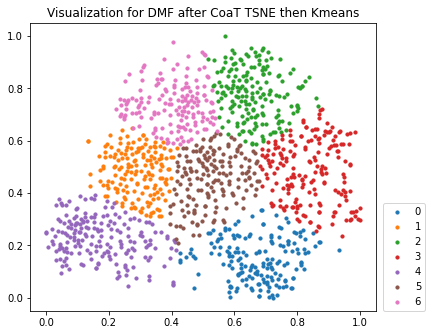

In [57]:
# visualize after doing kmeans on tsne features
kmeans = KMeans(n_clusters=len(id_2_name_dic[dataset_name]), random_state=42).fit(tsne)
new_labels = kmeans.labels_
# initialize a matplotlib plot
fig = plt.figure(figsize=(8,5))
# ax = fig.add_subplot(111)
ax = plt.axes([0.05,0.05,0.6,0.8])
 
# for every class, we'll add a scatter plot separately
for label_id in range(len(id_2_name_dic[dataset_name])):
    # find the samples of the current class in the data
    indices = [i for i, l in enumerate(new_labels) if l == label_id]
 
    # extract the coordinates of the points of this class only
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
 
    # convert the class color to matplotlib format
    # color = np.array(colors_per_class[label], dtype=np.float32) / 255
    # color=colors_per_class[label]
 
    # add a scatter plot with the corresponding color and label
    ax.scatter(current_tx, current_ty, label=label_id, s=10)
    ax.set_title('Visualization for {} after CoaT TSNE then Kmeans'.format(dataset_name))
 
# build a legend using the labels we set previously
ax.legend(bbox_to_anchor=(1.02,0), loc=3, borderaxespad=0)
save_path = '/ubc/ece/home/ra/grads/siyi/Research/skin_lesion_segmentation/figures/{}_coat_TSNEKmeans.jpg'.format(dataset_name)
# plt.savefig(save_path)
# finally, show the plot
plt.show()

In [27]:
'''
visualization for four datasets
'''
features = np.concatenate(features_list, axis=0)
# features = PCA(n_components=128).fit_transform(features)
tsne = TSNE(n_components=2, perplexity=30, n_iter=5000).fit_transform(features)
# print(features.shape)

/ubc/ece/home/ra/grads/siyi/anaconda3/envs/skinlesion/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/ubc/ece/home/ra/grads/siyi/anaconda3/envs/skinlesion/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [28]:
print(features.shape)

(4212, 512)


In [29]:
# extract x and y coordinates representing the positions of the images on T-SNE plot
tx = tsne[:, 0]
ty = tsne[:, 1]
 
tx = scale_to_01_range(tx)
ty = scale_to_01_range(ty)

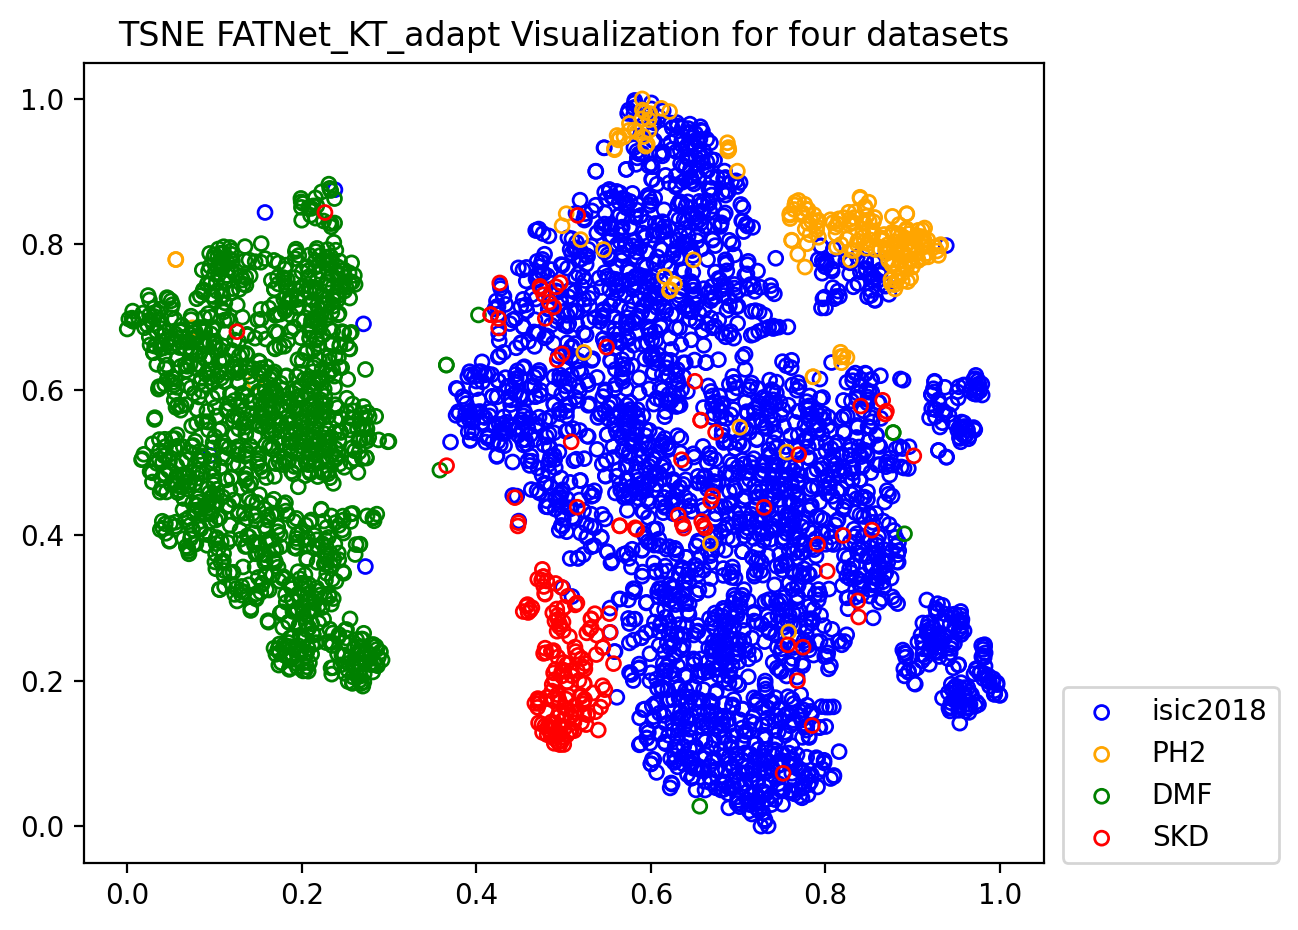

In [30]:
# initialize a matplotlib plot
fig = plt.figure(figsize=(8,5), dpi=200)
# ax = fig.add_subplot(111)
ax = plt.axes([0.05,0.05,0.6,0.8])
l_pos, r_pos = 0, 0
shape = {'isic2018':'o','PH2':'v','DMF':'s','SKD':'D'}
color = {'isic2018':'blue','PH2':'orange','DMF':'green','SKD':'red'}

# 'isic2018','PH2','DMF','SKD'
for label_id, dataset_name in enumerate(['isic2018','PH2','DMF','SKD']):
    indices = [i for i, l in enumerate(dataset_id_list) if l == label_id]
    data_tx = np.take(tx, indices)
    data_ty = np.take(ty, indices)
    # diagnosis_ids = diagnosis_id_dic[dataset_name]
    # l_pos, r_pos = r_pos, r_pos+len(diagnosis_ids) # for slice current dataset tx ty
    # data_tx = tx[l_pos:r_pos]
    # data_ty = ty[l_pos:r_pos]
    if dataset_name == '':
        pass
    else:
        ax.scatter(data_tx, data_ty, label=dataset_name, s=25,marker='o',facecolors='none',edgecolors=color[dataset_name])
        
ax.set_title('TSNE {} Visualization for four datasets'.format(model_name))
# build a legend using the labels we set previously
ax.legend(bbox_to_anchor=(1.02,0), loc=3, borderaxespad=0)
save_path = '/ubc/ece/home/ra/grads/siyi/Research/skin_lesion_segmentation/figures/sup/supuse_{}_{}_TSNE.jpg'.format('four',model_name)
plt.savefig(save_path)
# finally, show the plot
plt.show()

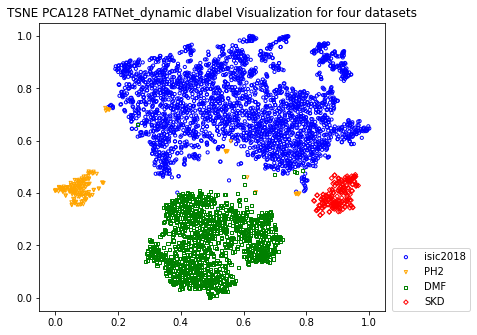

In [18]:
# visualize for dynamic labels
fig = plt.figure(figsize=(8,5))
# ax = fig.add_subplot(111)
ax = plt.axes([0.05,0.05,0.6,0.8])
l_pos, r_pos = 0, 0
shape = {'isic2018':'o','PH2':'v','DMF':'s','SKD':'D'}


for label_id,dataset_name in enumerate(['isic2018','PH2','DMF','SKD']):
    indices = [i for i, l in enumerate(d_label_list) if l == label_id]
    data_tx = np.take(tx, indices)
    data_ty = np.take(ty, indices)
    ax.scatter(data_tx, data_ty, label=dataset_name, s=10, marker=shape[dataset_name],facecolors='none',edgecolors=color[dataset_name])
        
ax.set_title('TSNE PCA128 {} dlabel Visualization for four datasets'.format(model_name))
# build a legend using the labels we set previously
ax.legend(bbox_to_anchor=(1.02,0), loc=3, borderaxespad=0)
save_path = '/ubc/ece/home/ra/grads/siyi/Research/skin_lesion_segmentation/figures/{}_PCA128_{}_dlabel_TSNE.jpg'.format('four',model_name)
# plt.savefig(save_path)
# finally, show the plot
plt.show()

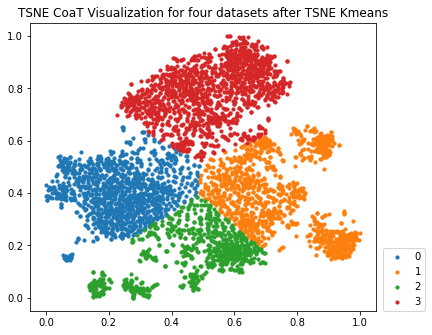

In [19]:
# visualize after doing kmeans on tsne features
kmeans = KMeans(n_clusters=4, random_state=42).fit(tsne)
new_labels = kmeans.labels_
# initialize a matplotlib plot
fig = plt.figure(figsize=(8,5))
# ax = fig.add_subplot(111)
ax = plt.axes([0.05,0.05,0.6,0.8])
l_pos, r_pos = 0, 0

for label_id in range(4):
    # find the samples of the current class in the data
    indices = [i for i, l in enumerate(new_labels) if l == label_id]
 
    # extract the coordinates of the points of this class only
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
 
    # add a scatter plot with the corresponding color and label
    ax.scatter(current_tx, current_ty, label=label_id, s=10,)
        
ax.set_title('TSNE CoaT Visualization for four datasets after TSNE Kmeans')
# build a legend using the labels we set previously
ax.legend(bbox_to_anchor=(1.02,0), loc=3, borderaxespad=0)
save_path = '/ubc/ece/home/ra/grads/siyi/Research/skin_lesion_segmentation/figures/{}_coat_TSNEKmeans.jpg'.format('four')
# plt.savefig(save_path)
# finally, show the plot
plt.show()

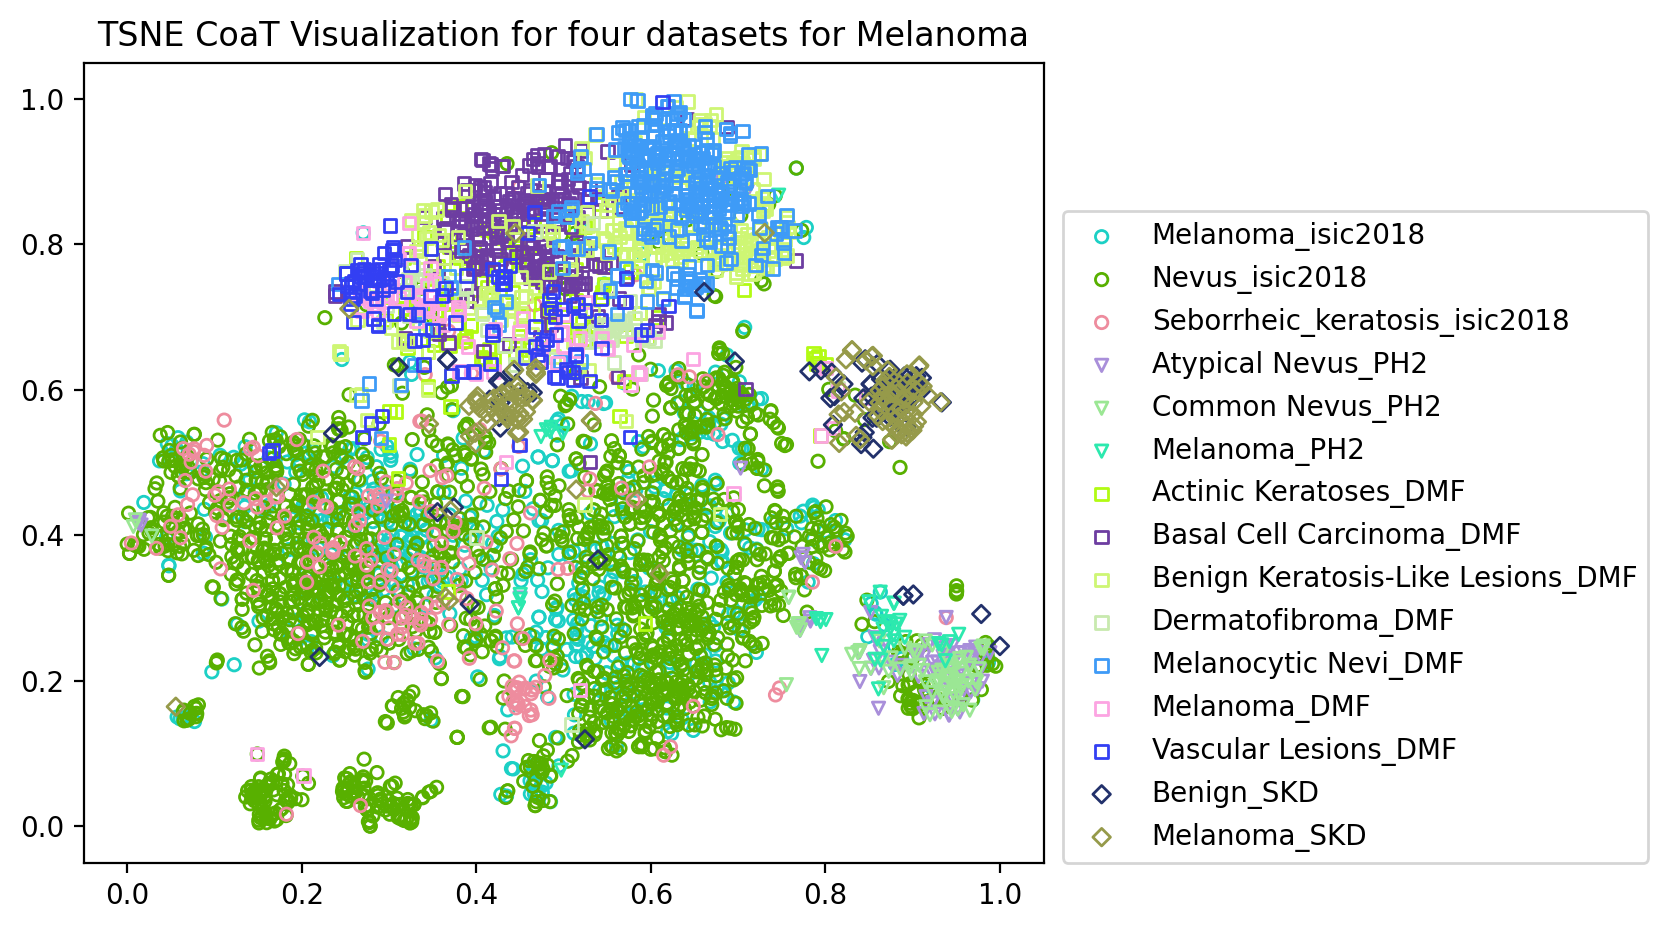

In [20]:
id_2_name_dic = {
    'isic2018':['Melanoma', 'Nevus', 'Seborrheic_keratosis'],
    'PH2': ['Atypical Nevus', 'Common Nevus', 'Melanoma'],
    'DMF': ['Actinic Keratoses','Basal Cell Carcinoma','Benign Keratosis-Like Lesions', 
    'Dermatofibroma', 'Melanocytic Nevi', 'Melanoma', 'Vascular Lesions'],
    'SKD': ['Benign', 'Melanoma']
}
dataset_list = ['isic2018','PH2','DMF','SKD']
# show four datasets per class
# initialize a matplotlib plot
fig = plt.figure(figsize=(8,5),dpi=200)
# ax = fig.add_subplot(111)
ax = plt.axes([0.05,0.05,0.6,0.8])
l_pos, r_pos = 0, 0
shape = {'isic2018':'o','PH2':'v','DMF':'s','SKD':'D'}

for dataset_name in ['isic2018','PH2','DMF','SKD']:
    # diagnosis_ids = diagnosis_id_dic[dataset_name]
    # l_pos, r_pos = r_pos, r_pos+len(diagnosis_ids) # for slice current dataset tx ty
    # data_tx = tx[l_pos:r_pos]
    # data_ty = ty[l_pos:r_pos]
    set_id = dataset_list.index(dataset_name)
    indices = [i for i, l in enumerate(dataset_id_list) if l == set_id]
    data_tx = np.take(tx, indices)
    data_ty = np.take(ty, indices)
    diagnosis_ids = np.take(diagnosis_id_list, indices)
    # for every class, we'll add a scatter plot separately
    for label_id in range(len(id_2_name_dic[dataset_name])):
        # find the samples of the current class in the data
        indices = [i for i, l in enumerate(diagnosis_ids) if l == label_id]
    
        # extract the coordinates of the points of this class only
        current_tx = np.take(data_tx, indices)
        current_ty = np.take(data_ty, indices)
    
        # convert the class color to matplotlib format
        # color = np.array(colors_per_class[label], dtype=np.float32) / 255
        # color=colors_per_class[label]
    
        # add a scatter plot with the corresponding color and label
        # if id_2_name_dic[dataset_name][label_id]=='Melanoma':
        color = mpc.rgb2hex(list(np.random.random(3)))
        ax.scatter(current_tx, current_ty, label='{}_{}'.format(id_2_name_dic[dataset_name][label_id],dataset_name,), 
            s=20, edgecolors=color,facecolors='none', marker=shape[dataset_name])
        
ax.set_title('TSNE CoaT Visualization for four datasets for Melanoma')
# ax.set_title('TSNE {} Visualization for four datasets'.format(model_name))
# build a legend using the labels we set previously
ax.legend(bbox_to_anchor=(1.02,0), loc=3, borderaxespad=0)
save_path = '/ubc/ece/home/ra/grads/siyi/Research/skin_lesion_segmentation/figures/four_{}_TSNE_Melanoma.jpg'.format(model_name)
# save_path = '/ubc/ece/home/ra/grads/siyi/Research/skin_lesion_segmentation/figures/four_{}_TSNE_four.jpg'.format(model_name)
# plt.savefig(save_path)
# finally, show the plot
plt.show()

In [23]:
dataset_list.index('isic2018')

0

In [ ]:
# visualize after doing kmeans on tsne features
kmeans = KMeans(n_clusters=15, random_state=42).fit(tsne)
new_labels = kmeans.labels_
# initialize a matplotlib plot
fig = plt.figure(figsize=(8,5),dpi=200)
# ax = fig.add_subplot(111)
ax = plt.axes([0.05,0.05,0.6,0.8])
l_pos, r_pos = 0, 0

for label_id in range(15):
    # find the samples of the current class in the data
    indices = [i for i, l in enumerate(new_labels) if l == label_id]
 
    # extract the coordinates of the points of this class only
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
 
    # add a scatter plot with the corresponding color and label
    ax.scatter(current_tx, current_ty, label=label_id, s=10)

ax.set_title('TSNE CoaT Visualization for four datasets for per class after TSNE Kmeans')
# build a legend using the labels we set previously
ax.legend(bbox_to_anchor=(1.02,0), loc=3, borderaxespad=0)
save_path = '/ubc/ece/home/ra/grads/siyi/Research/skin_lesion_segmentation/figures/four_coat_TSNEKmeans_per_class.jpg'
plt.savefig(save_path)
# finally, show the plot
plt.show()

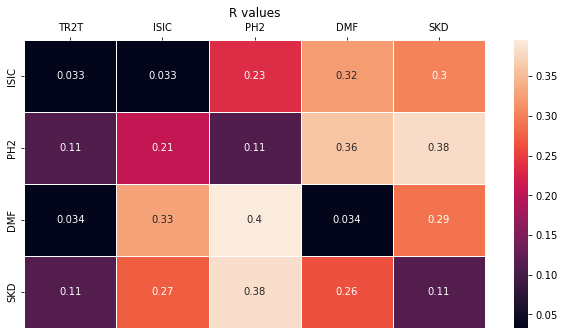

In [185]:
# --------------------------------------------------------------------------------------------
# generate heatmap for the R table
df_path = '/ubc/ece/home/ra/grads/siyi/Research/skin_lesion_segmentation/results/R_Values_noval.csv'
df = pd.read_csv(df_path)
# # plt.figure(figsize=(100,8), dpi=200)
# # sns.heatmap(record_array[0:7, :], annot=True, fmt=".2g", linewidths=.5)
fig = plt.figure(figsize=(10,5))
ax = plt.axes([0.05,0.05,0.8,0.8])
sns.heatmap(df, annot=True, fmt=".2g", linewidths=.5)
plt.yticks([0.5,1.5,2.5,3.5],['ISIC','PH2','DMF','SKD'])
ax.xaxis.set_ticks_position('top')
name = 'R values'
plt.title(name)
plt.savefig('/ubc/ece/home/ra/grads/siyi/Research/skin_lesion_segmentation/figures/R_Values_noval.jpg')
plt.show()
